In [7]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from scipy.optimize import curve_fit

In [ ]:
wavelength_bins = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.75, 1.85, 1.95]
retardance = np.array([1-data1100[1], 1-data1200[1], 1-data1300[1], 1-data1400[1], data1500[1], data1600[1], data1750[1], data1850[1], data1950[1]])+1

In [9]:
# retardance: [1.89978199 1.81664984 1.66432003 1.54133791 1.42635064 1.33515326 1.22203268 1.16564758 1.09777618]
retardance = [1.89978199, 1.81664984, 1.66432003, 1.54133791, 1.42635064, 1.33515326, 1.22203268, 1.16564758, 1.09777618]

In [ ]:
y_err1 = np.array([data1100[4], data1200[4], data1300[4], data1400[4], data1500[4], data1600[4], data1750[4], data1850[4], data1950[4]])
y_err1 = y_err1/(2*np.pi)
print(y_err1)

In [10]:
# [0.0259693  0.00890342 0.01060559 0.02133995 0.01415686 0.0051448 0.00739807 0.00702572 0.0180334 ]
y_err1 = [0.0259693, 0.00890342, 0.01060559, 0.02133995, 0.01415686, 0.0051448, 0.00739807, 0.00702572, 0.0180334]

In [12]:
n_e = np.loadtxt("../Dodge-e.csv", delimiter=",",skiprows=1)
n_o = np.loadtxt("../Dodge-o.csv", delimiter=",",skiprows=1)

wavelength_bins = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.75, 1.85, 1.95]
specific_ne = np.interp(wavelength_bins, n_e[:,0], n_e[:,1])
specific_no = np.interp(wavelength_bins, n_o[:,0], n_o[:,1])

In [15]:
initial_guess = [185] # initial guess for d, in microns
popt, pcov = curve_fit(lambda w, d: d*(specific_ne - specific_no)/w, wavelength_bins, retardance, sigma=y_err1, p0=initial_guess)
print(popt, "This is the best fit value of d")
print(list(np.sqrt(np.diagonal(pcov))), "This is the uncertainty in the best fit values")
d = popt[0]

[188.18689935] This is the best fit value of d
[0.6018159865003964] This is the uncertainty in the best fit values


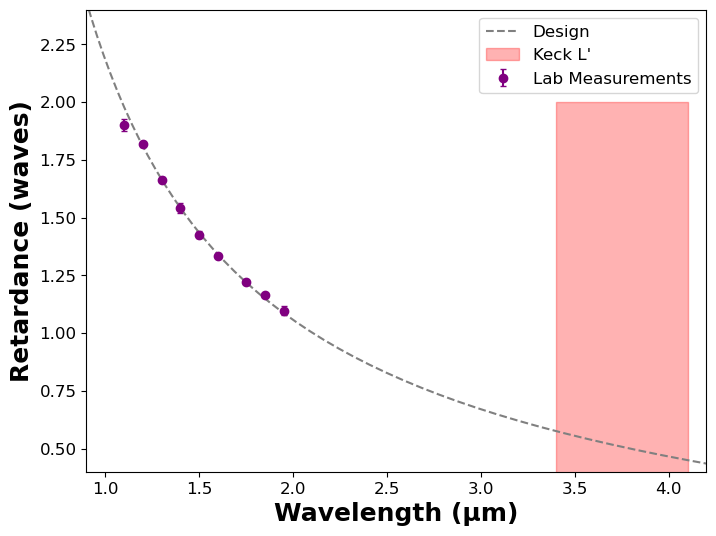

In [ ]:
# plt.figure(figsize=(8, 6), dpi=300)
plt.figure(figsize=(8, 6))
plt.ylim(0.4, 2.4)
plt.xlim(0.9, 4.2)
plt.xlabel("Wavelength (μm)", fontsize=18, fontweight='bold')
plt.ylabel("Retardance (waves)", fontsize=18, fontweight='bold')

plt.errorbar(wavelength_bins, retardance, yerr=y_err1, marker='o', capsize=2, linestyle=' ', color = 'purple', label = 'Lab Measurements')
plt.plot(n_e[:,0], 1/n_e[:,0]*d*(n_e[:,1]-n_o[:,1]), label="Design", linestyle='--', color='gray')
plt.fill_between([3.4, 4.1],0,2,color='r',alpha=0.3, label="Keck L'")

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)

# folder_path = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/SuperK_Select_Data/"
folder_path = "./Figures/"
file_name = 'L_HWP_Best_Fit.png'
# plt.savefig(folder_path + file_name, bbox_inches='tight', dpi=300)